In [1]:
import numpy as np
import matplotlib.pyplot as plt

import utils
import sample

(-1.0, 1.0)

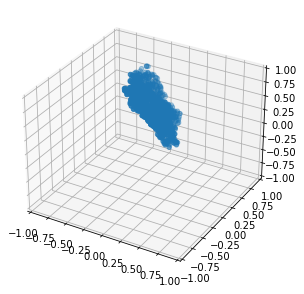

In [2]:
HC_w2 = np.loadtxt('data/3D_historymatch_hypercube_w2.txt')

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
ax.scatter(HC_w2[:,0],HC_w2[:,1],HC_w2[:,2])
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])

(2, 2)


(-1.0, 1.0)

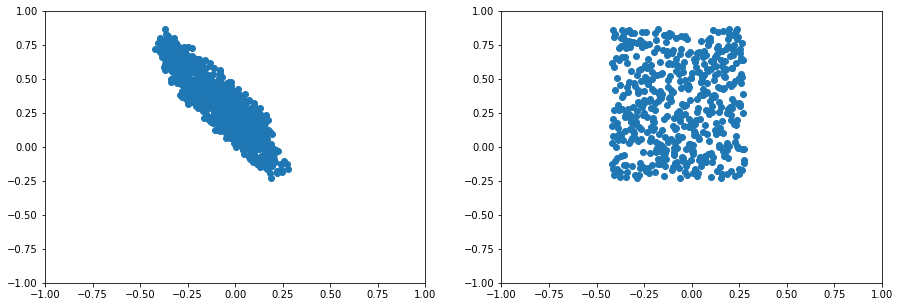

In [3]:

samples_2D = np.concatenate((HC_w2[:,0].reshape(-1,1),HC_w2[:,2].reshape(-1,1)),axis=1)
bounds = utils.locate_boundaries(samples_2D, 2)
LH_samples = sample.LHsampling(2, 500, bounds)

'''
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
ax.scatter(LH_samples[:,0],LH_samples[:,1],LH_samples[:,2])
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])'''

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
ax1.scatter(HC_w2[:,0],HC_w2[:,2])
ax2.scatter(LH_samples[:,0],LH_samples[:,1])
ax1.set_xlim([-1,1])
ax1.set_ylim([-1,1])
ax2.set_xlim([-1,1])
ax2.set_ylim([-1,1])

In [4]:


# find angle of samples
eigvals, eigvecs = np.linalg.eigh(np.cov(samples_2D.T))
order = eigvals.argsort()[::-1]
#eigvals, eigvecs = eigvals[order], eigvecs[:, order]
vx, vy = eigvecs[:,0][0], eigvecs[:,0][1]
theta = -np.pi/2 + np.arctan2(vy, vx)

R_eigvals = np.concatenate((eigvecs[0].reshape(-1,1),eigvecs[1].reshape(-1,1)),axis=1)

print(R_eigvals)
samples_rotate = np.zeros((len(LH_samples),2))

#for i in range(len(LH_samples)):
    #samples_rotate[i] = np.dot(R, LH_samples[i])
    
    
samples_rotate2 = np.zeros((len(LH_samples),2))

for i in range(len(LH_samples)):
    samples_rotate2[i] = np.dot(R_eigvals, LH_samples[i])
    
    
w2_samples_str = np.zeros((len(samples_2D),2))

for i in range(len(samples_2D)):
    w2_samples_str[i] = np.dot(R_eigvals.T, samples_2D[i])
    

[[-0.82918982 -0.55896712]
 [-0.55896712  0.82918982]]


In [5]:
bounds_new = utils.locate_boundaries(w2_samples_str, 2)
LH_samples_new = sample.LHsampling(2, 500, bounds_new)

samples_new_rotate = np.zeros((len(LH_samples_new),2))

for i in range(len(LH_samples)):
    samples_new_rotate[i] = np.dot(R_eigvals, LH_samples_new[i])

(2, 2)


(-1.0, 1.0)

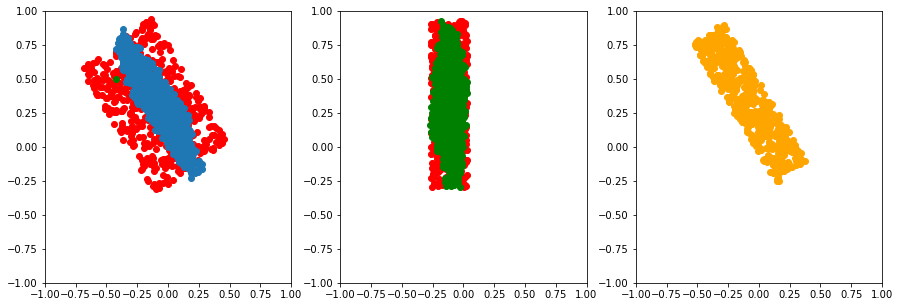

In [6]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

#ax1.scatter(samples_rotate[:,0],samples_rotate[:,1], color='orange')
ax1.scatter(samples_rotate2[:,0],samples_rotate2[:,1], color='red')


ax1.scatter(HC_w2[:,0],HC_w2[:,2])
ax2.scatter(LH_samples_new[:,0],LH_samples_new[:,1], color='red')

ax2.scatter(w2_samples_str[:,0],w2_samples_str[:,1], color='green')

mins = np.argmin(samples_2D, axis=0)

ax1.scatter(HC_w2[mins[0]][0], HC_w2[mins[0]][1], color='green')


ax3.scatter(samples_new_rotate[:,0],samples_new_rotate[:,1], color='orange')
ax1.set_xlim([-1,1])
ax1.set_ylim([-1,1])
ax2.set_xlim([-1,1])
ax2.set_ylim([-1,1])
ax3.set_xlim([-1,1])
ax3.set_ylim([-1,1])

In [7]:
a1 = 5
a2 = 7
b1 = 6
b2 = 9
c2 = 2
c1 = -3

V = (a2-a1)*(b2-b1)*(c2-c1)

print(V)

print(0.68*V)

scale = (0.68**(1/3))

V2 = (scale*a2 - scale*a1)*(scale*b2 - scale*b1)*(scale*c2 - scale*c1)
print(V2)

30
20.400000000000002
20.40000000000001


In [32]:
ar = np.empty((0,2))

samps = np.random.normal(0, 0.1, 3)
samps2 = np.random.normal(0, 0.1, 3)

samps_all = np.concatenate((samps.reshape(-1,1), samps2.reshape(-1,1)),axis=1)

ar = np.append(ar, samps_all, axis=0)
ar = np.append(ar, samps_all, axis=0)

print(ar)

[[-0.00789136  0.00683056]
 [-0.17619169 -0.08383472]
 [ 0.14763281 -0.12741235]
 [-0.00789136  0.00683056]
 [-0.17619169 -0.08383472]
 [ 0.14763281 -0.12741235]]
